In [57]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.linalg import hankel

params = {}
params['embedding_dimension'] = 4
params['partial_measurement'] =5
params['latent_dim'] = 8

In [58]:
with open('Results/final_output.pkl', 'rb') as f:
    results = pickle.load(f)

X_ori = results['x'].cpu().detach().numpy()
z = results['z'].cpu().detach().numpy()
sindy_coeff = results['sindy_coefficients'].cpu().detach().numpy()
Theta = results['Theta'].cpu().detach().numpy()

measured_index = [i*params['embedding_dimension'] for i in range(params['partial_measurement'])]
X_ori = X_ori[:, measured_index]

In [59]:
train_loss = np.load("Results/train_loss.npy")
val_loss = np.load("Results/val_loss.npy")

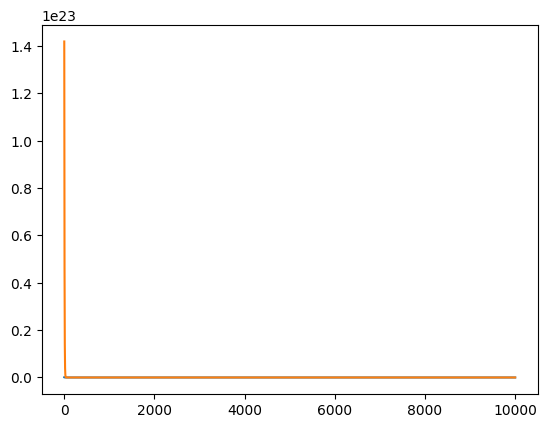

In [60]:
plt.plot(train_loss)
plt.plot(val_loss)

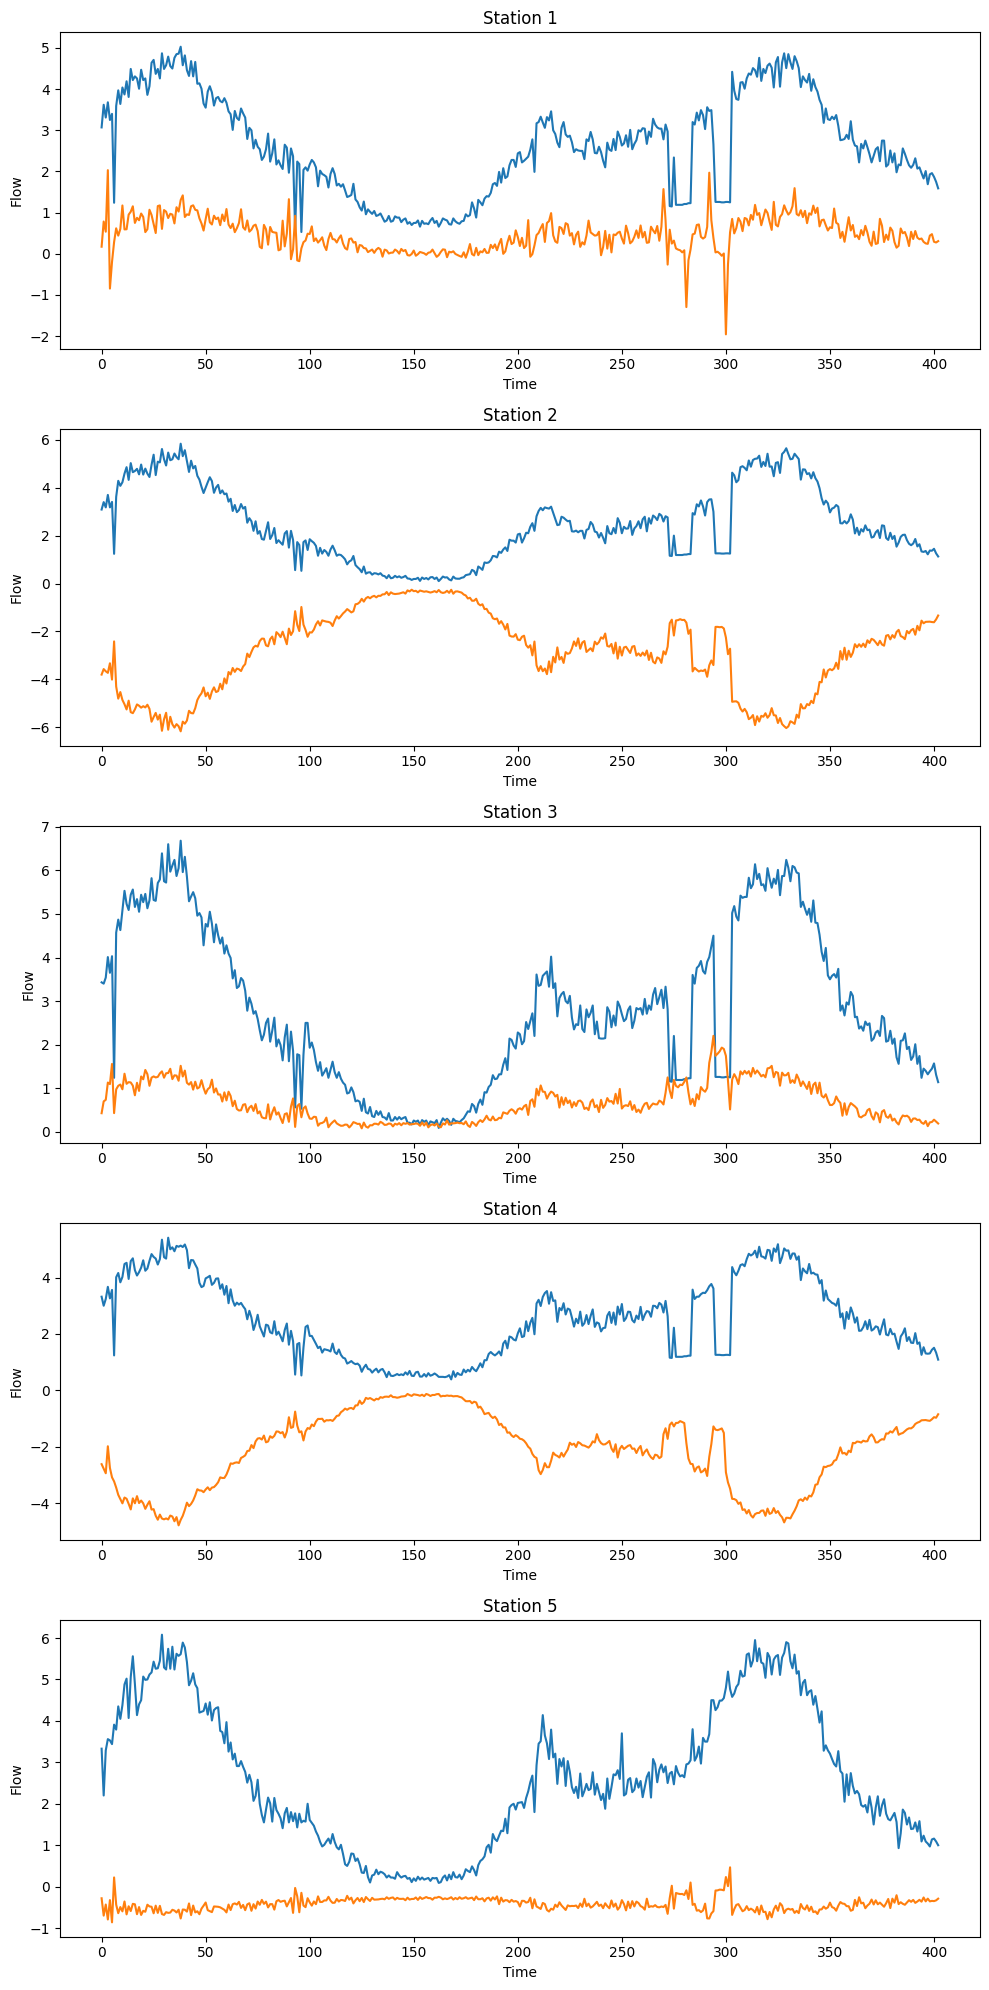

In [61]:
# Create a figure with 5 subplots (one for each column)
fig, axs = plt.subplots(nrows=X_ori.shape[1], ncols=1, figsize=(10, 20))

# Plot each column in a separate subplot
for i in range(X_ori.shape[1]):
    axs[i].plot(X_ori[:, i])
    axs[i].plot(z[:,i])

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Flow')

# Show the figure
plt.tight_layout()
plt.show()

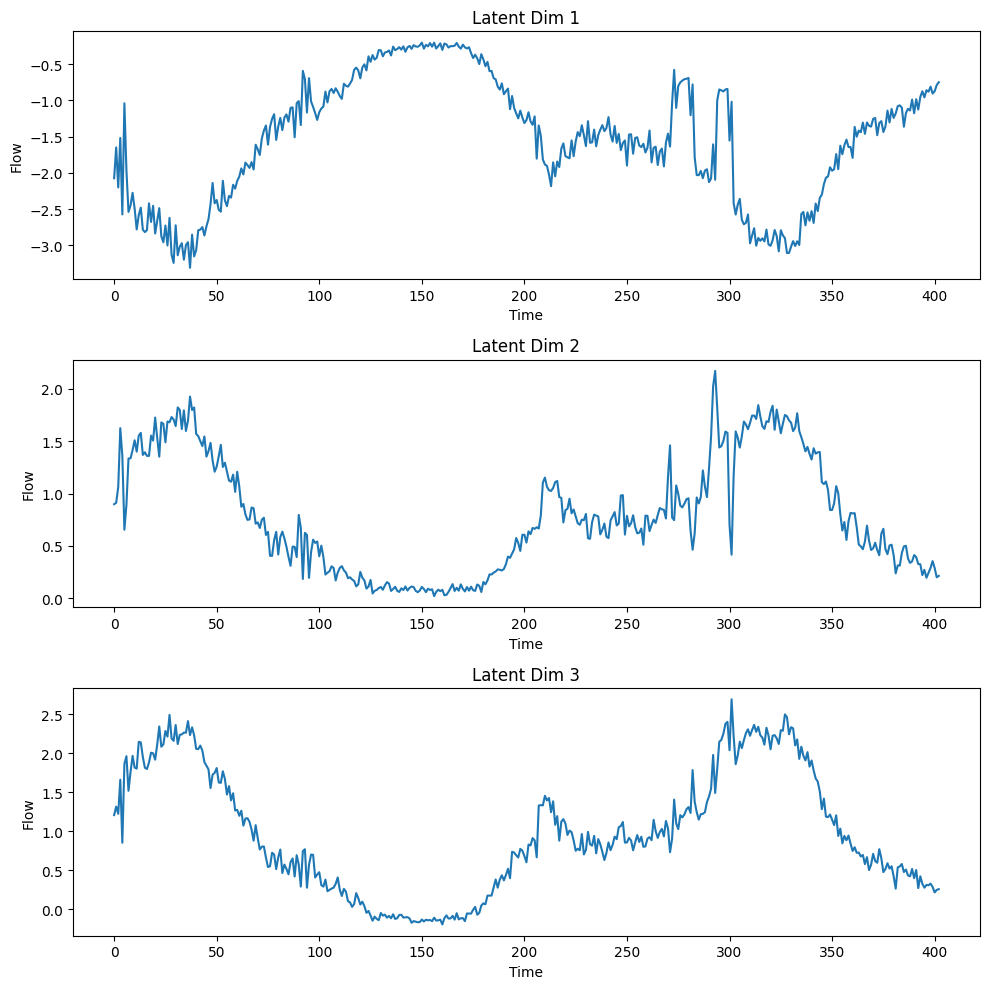

In [62]:
fig, axs = plt.subplots(nrows=params['latent_dim'] - params['partial_measurement'], ncols=1, figsize=(10, 10))

# Plot each column in a separate subplot
for i in range(params['partial_measurement'],z.shape[1]):
    #axs[i].plot(X_ori[:, i])
    axs[i-params['partial_measurement']].plot(z[:,i])

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Latent Dim {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Flow')

# Show the figure
plt.tight_layout()
plt.show()

In [63]:
dz_predict = results['dz_predict'].cpu().detach().numpy()
dz = results['dz'].cpu().detach().numpy()

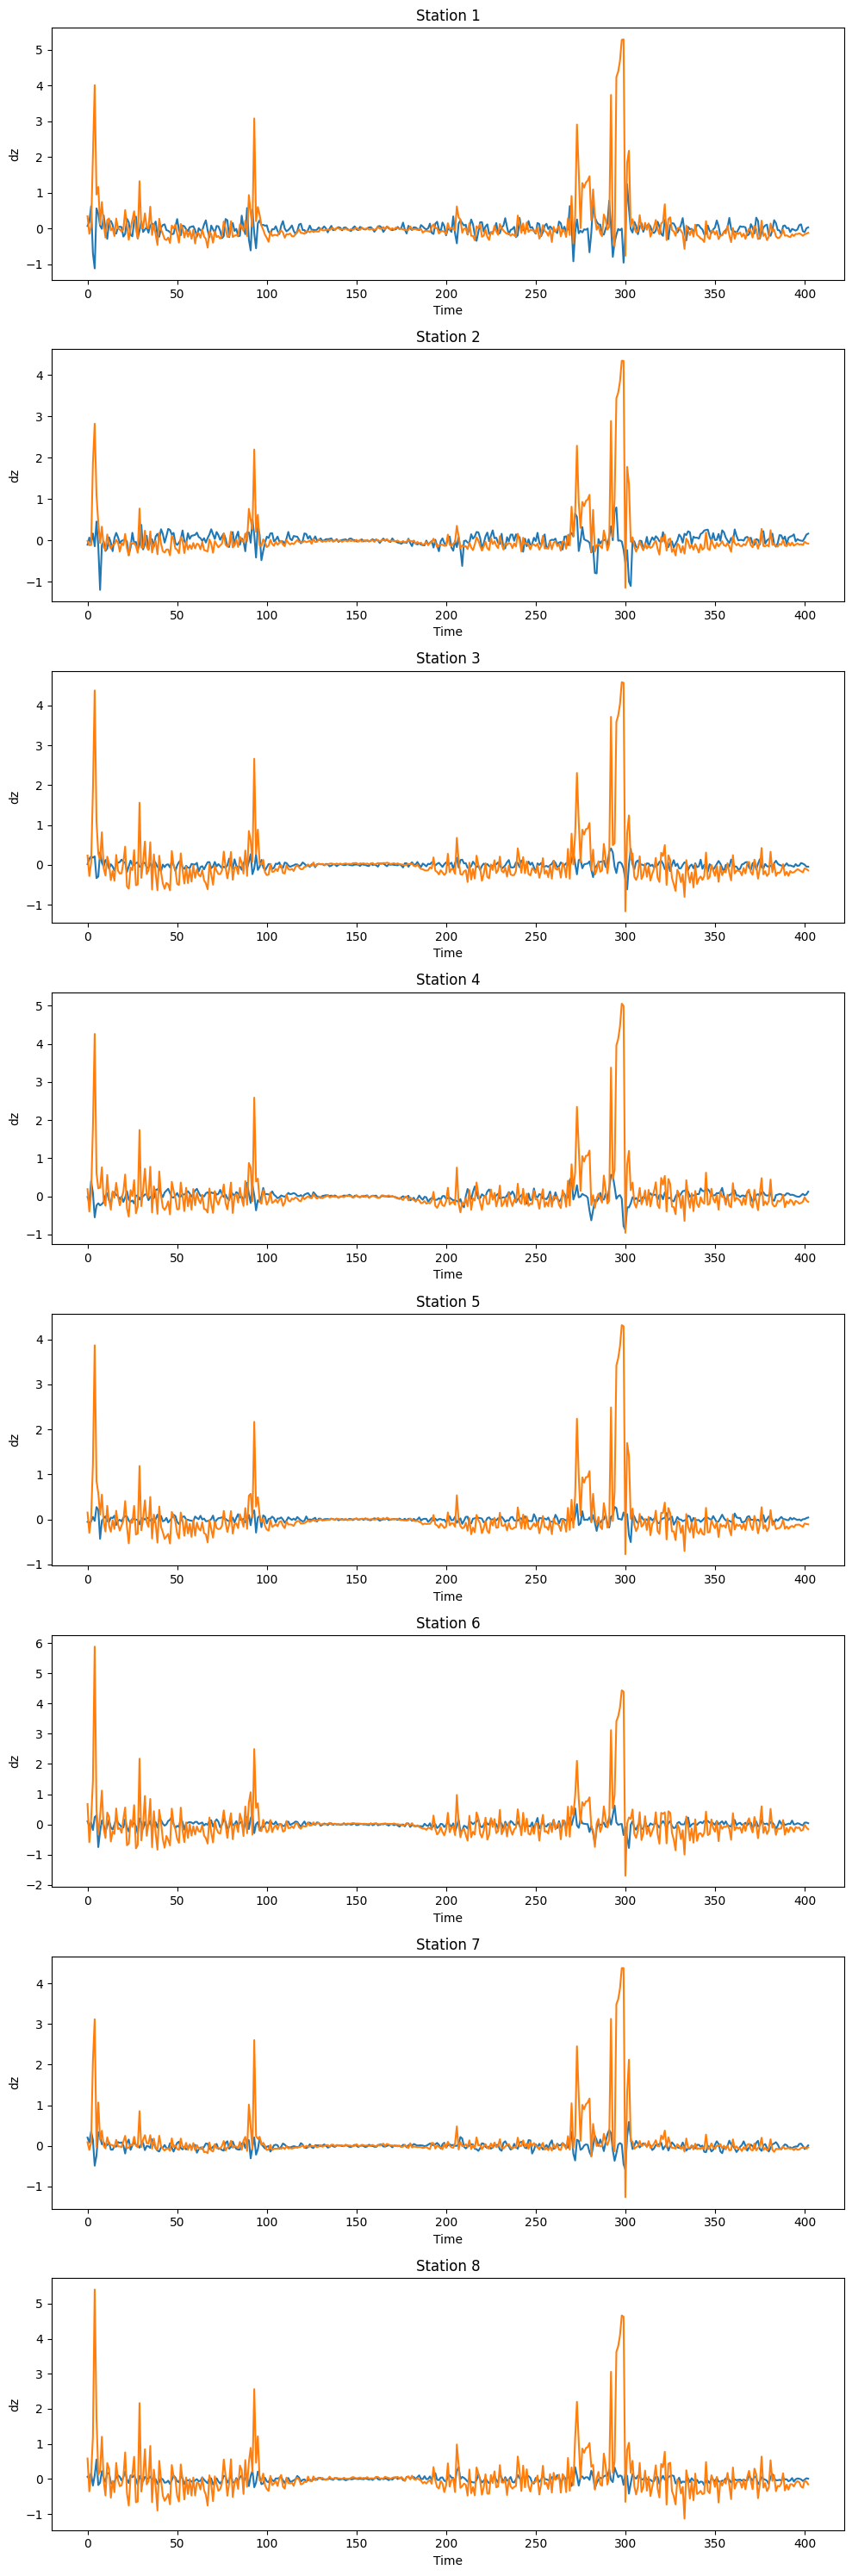

In [64]:
fig, axs = plt.subplots(nrows=z.shape[1], ncols=1, figsize=(10, 30))

# Plot each column in a separate subplot
for i in range(z.shape[1]):
    axs[i].plot(dz[:, i])
    axs[i].plot(dz_predict[:,i])

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('dz')

# Show the figure
plt.tight_layout()
plt.show()

In [37]:
#Simulate data with discovered governing equations
total_sim_timestep = 405
total_pred_step = 3
s = (total_sim_timestep, params['latent_dim'])
sim_result = np.zeros(s)

In [38]:
from sindy_utils import sindy_library

In [39]:
for t in range(0,total_sim_timestep,total_pred_step):
    z_init = z[t,:].reshape(1,-1)
    for s in range(total_pred_step):
        Theta_curr = sindy_library(z_init,2,False)
        dz_curr = np.matmul(Theta_curr,sindy_coeff)
        z_new = z_init + dz_curr
        sim_result[t+s,:] = z_init
        z_init = np.array(z_new)

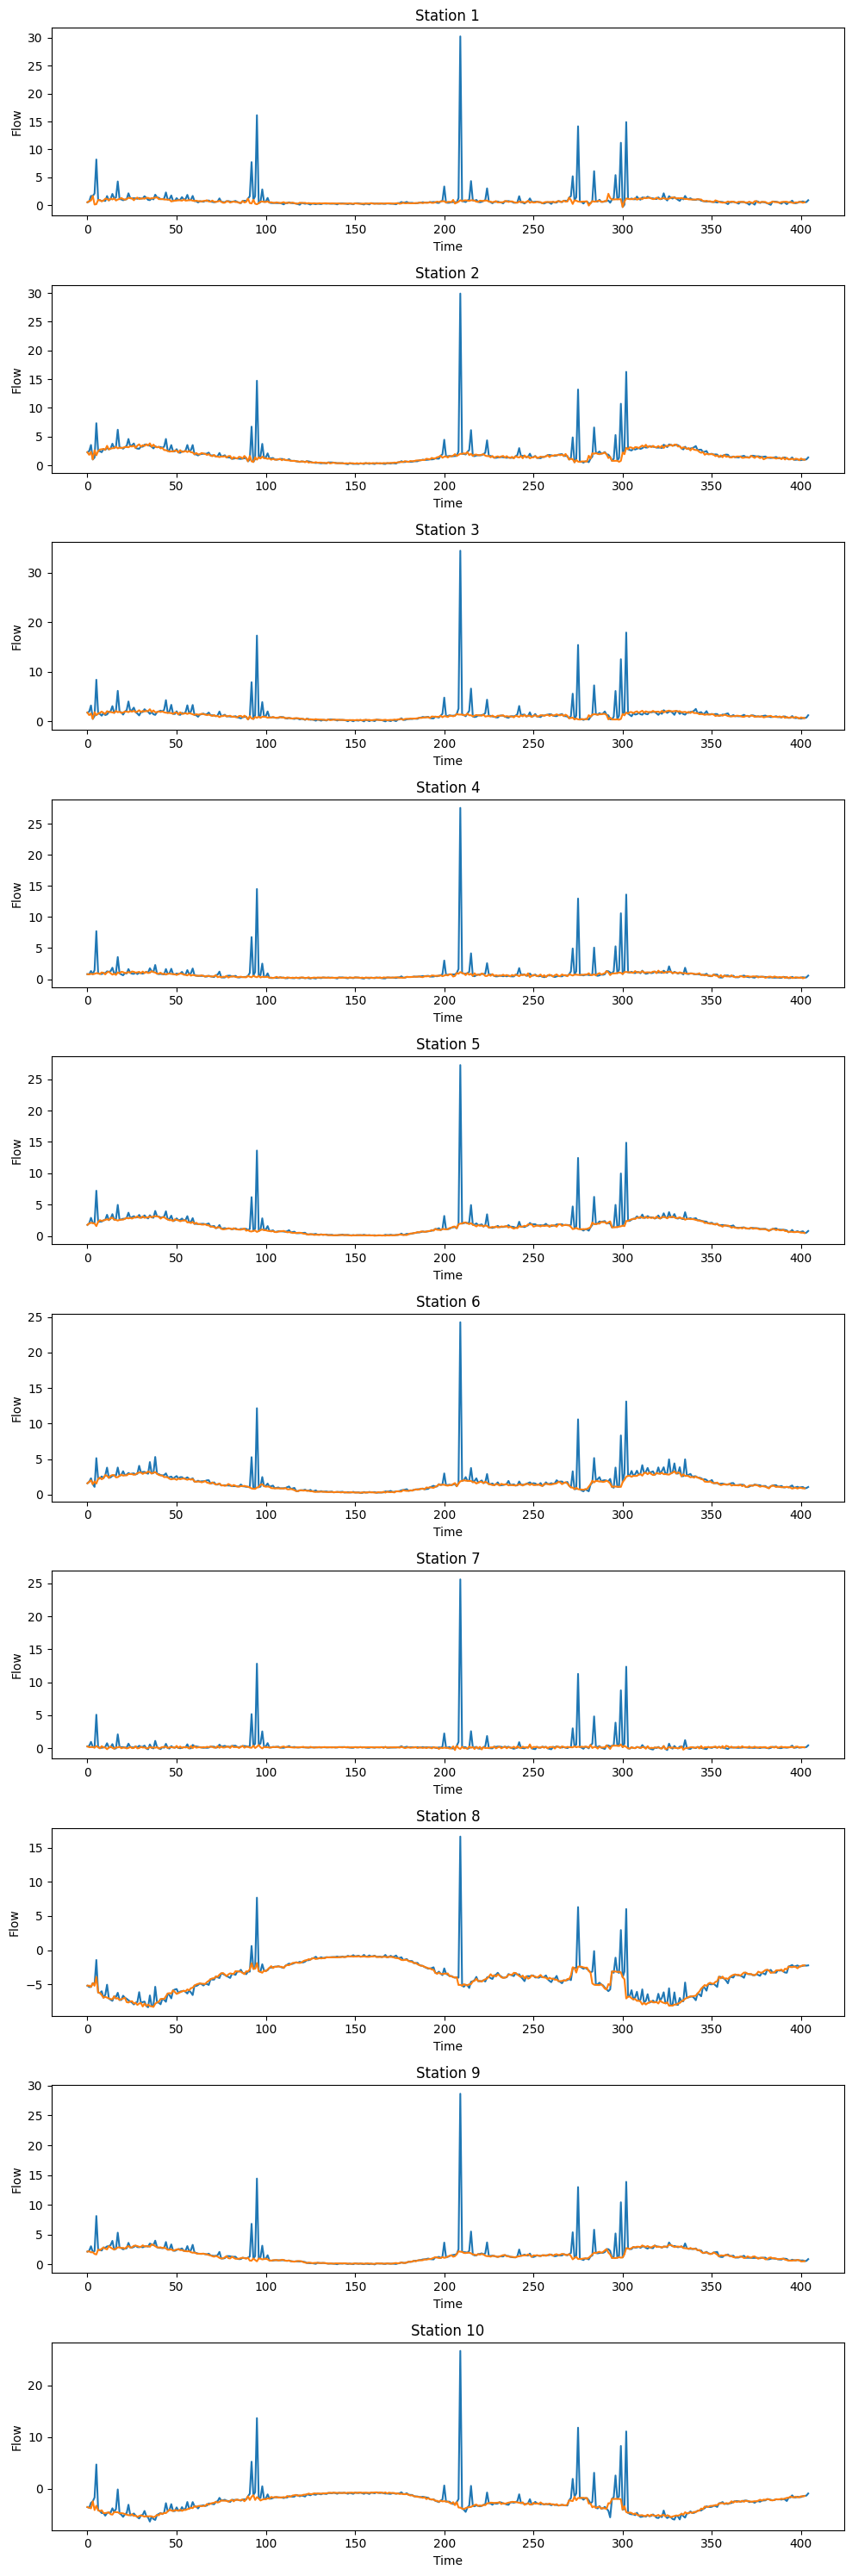

In [40]:
fig, axs = plt.subplots(nrows=z.shape[1], ncols=1, figsize=(10, 30))

# Plot each column in a separate subplot
for i in range(z.shape[1]):
    axs[i].plot(sim_result[:, i])
    axs[i].plot(z[:,i])

# Add titles and axis labels to the subplots
for i, ax in enumerate(axs):
    ax.set_title(f'Station {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Flow')

# Show the figure
plt.tight_layout()
plt.show()